---
# 3D Wing Motion Kinematics

---

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
try:
    plt.style.use('jupyter')
except OSerror:
    print('...')

#### Marin Lauber 2020

The ellipsoidal wing is defined as

\begin{equation}
    \frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1,
\end{equation}

with $a=0.5$, $b=0.05$ and $c=1$. 

In [2]:
# wing
def chord(r, a=0.5):
    return np.sqrt(abs((1-r**2)*a**2))
def c(r, Rtip=1.25):
    return np.where(r<(Rtip-1.0), 0, chord(r-.75))

Its motion is deine by three Euler angles

\begin{split}
    \varphi(t) &= A_\varphi\cos(2\pi f_r t), \\
    \theta(t) &= A_\theta\sin(2\pi f_\theta t), \\
    \alpha(t) &= \frac{\pi}{2} - A_\alpha\sin(2\pi f_r t + \xi),
\end{split}

where $\varphi(t)$ corresponds to the stroke variation, $\alpha(t)$ to the geometrical angle of attack and $\theta(t)$ to the deviation from the horizontal stroke plane. $\xi$ is the phase difference between $\alpha$ and $\theta$. Figure-0 motion are obtained by setting $f_\theta = f_r$ and figure-of-8 by setting $f_\theta = 2f_r$

In [3]:
# elevation angle
def theta(t, A, f): 
    return A*np.sin(2*np.pi*f*t)
def thetadot(t, A, f):
    return 2*np.pi*f*A*np.cos(2*np.pi*f*t)

# stroke angle
def phi(t, A, f): 
    return A*np.cos(2*np.pi*f*t)
def phidot(t, A, f):
    return -2*np.pi*f*A*np.sin(2*np.pi*f*t)

# angle of attack
def alpha(t, A, f, xi=0.): 
    return np.pi/2. - A*np.sin(2*np.pi*f*t + xi)
def alphadot(t, A, f, xi=0):
    return 2*np.pi*f*A*np.cos(2*np.pi*f*t + xi)

The aerodynamic performance of the flapping wing is evaluated using the drag coefficient $C_D$ and lift coefficient $C_L$

\begin{split}
    C_D &= \frac{F_x\cos(\varphi) - F_z\sin(\varphi)}{\frac{1}{2}\rho U_{ref}^2S}, \\
    C_L &= \frac{F_y}{\frac{1}{2}\rho U_{ref}^2S}. \\
\end{split}

The wing area is $S=\pi/4.$ and the reference velocity is defined as (average velocity magnitude over one period)

\begin{equation}
    U_{ref} = f_r\int_{0}^{1/f_r}\sqrt{\dot{\varphi}^2 + \dot{\theta}^2}dt R_g \qquad\left( = f_r\int_{0}^{1/f_r}|\dot{\varphi}| dt R_g\right).
\end{equation}

When $\theta(t)\equiv0$.

\begin{equation}
U_{ref} = 2\pi f_r A_\varphi f_r\int_{0}^{1/f_r}|\sin(2\pi f_r t)| dt R_g =0.5 \pi A_\varphi \int_{0}^{2}|\sin(\pi t)| dt R_g \sim 0.5 \pi A_\varphi 1.2732 R_g
\end{equation}
The radius of gyration is

\begin{equation}
    R_g = \sqrt{\frac{1}{S}\int_{0}^{R}cr^2 dr}.
\end{equation}

Both those integrals are better carried numerically.

In [4]:
# kinematic params
fr = 0.5
t, dt = np.linspace(0.0, 1./fr, 512, retstep=True)
r, dr = np.linspace(0, 2.5, 512, retstep=True)
A_phi = 0.35*np.pi
S = np.pi/2.
cbar = np.pi/4.
nu = 0.0273

In [5]:
# integrals
Rg = np.sqrt(1./S*trapz(c(r)*r**2, r, dr))
Uref = fr * trapz(abs(phidot(t, A_phi, fr)), t, dt) * Rg   

In [6]:
## printing stuff
print('Radius of gyration : %.3f' % Rg)
print('Uref : %.3f' % Uref)

Radius of gyration : 1.210
Uref : 2.660


The Reynolds number is defined as

\begin{equation}
    Re = \frac{\bar{c}U_{ref}}{\nu} = \frac{4A_\phi f_r R_g \bar{c}}{\nu}
\end{equation}

where $\nu=0.0273$ and the average cord length is $\bar{c} = \pi/4.$

In [7]:
# Reynolds number
def Re(Uref, cbar, nu, A_phi, fr, Rg):
    return Uref*cbar/nu, 4*A_phi*fr*Rg*cbar/nu

In [8]:
print('Reynolds number : %.1f (%.1f)' % Re(Uref, cbar, nu, A_phi, fr, Rg))

Reynolds number : 76.5 (76.5)


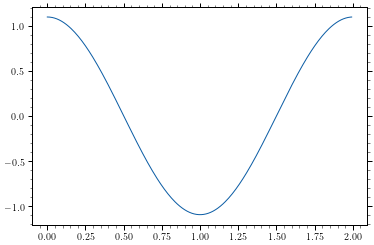

In [9]:
t = np.arange(0,256)
T = 128
plt.plot(t/T, phi(t/T, A_phi, fr));

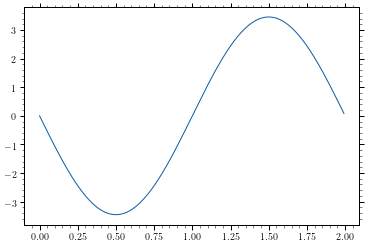

In [10]:
t = np.arange(0,256)
T = 128
plt.plot(t/T, phidot(t/T, A_phi, fr));

In [110]:
def ellipse(X, radius):
    abc = radius/max(radius)
    return np.sqrt(sum(X**2/abc**2)) - max(radius)

In [123]:
ellipse(np.array([0,0,.25]),np.array([1,1,.25]))

0.0

In [131]:
D = 40
x = 0.5*D*np.linspace(-2,2,64)
radius = 0.5*D*np.array([1,.5,.05])
print(radius/max(radius))
dist = np.zeros((len(x),len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        for k in range(len(x)):
            X = np.array([x[i],x[j],x[k]])
            dist[k,j,i] = ellipse(X, radius)

[1.   0.5  0.05]


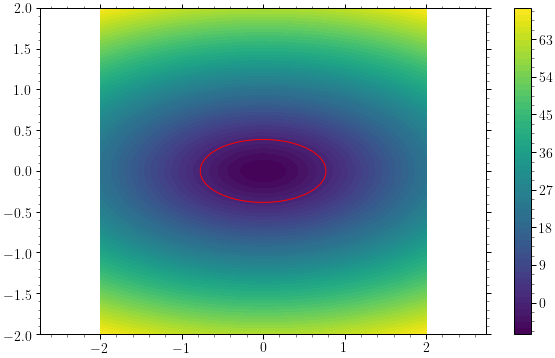

In [136]:
plt.contourf(x/(0.5*D),x/(0.5*D),dist[32,:,:], levels=51)
plt.colorbar()
plt.contour(x/(0.5*D),x/(0.5*D),dist[32,:,:],levels=0, colors="red")
plt.axis("equal");

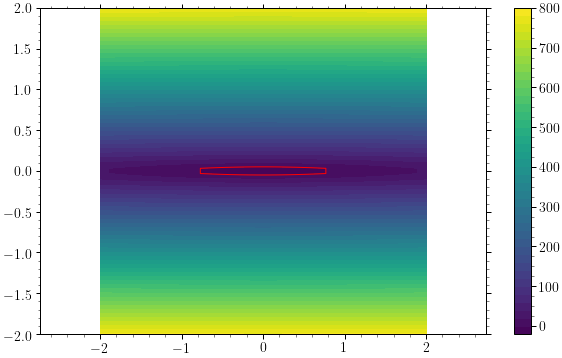

In [137]:
plt.contourf(x/(0.5*D),x/(0.5*D),dist[:,32,:], levels=51)
plt.colorbar()
plt.contour(x/(0.5*D),x/(0.5*D),dist[:,32,:],levels=0, colors="red")
plt.axis("equal");

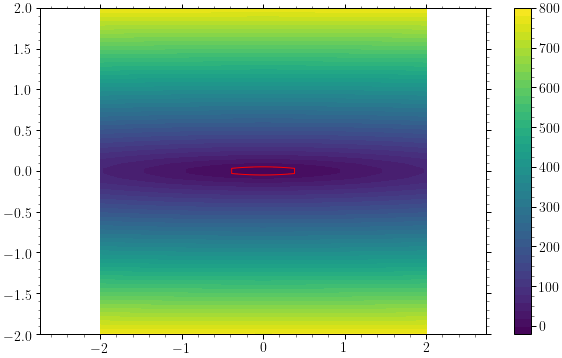

In [138]:
plt.contourf(x/(0.5*D),x/(0.5*D),dist[:,:,32], levels=51)
plt.colorbar()
plt.contour(x/(0.5*D),x/(0.5*D),dist[:,:,32],levels=0, colors="red")
plt.axis("equal");